In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from tsmoothie.smoother import *
import matplotlib.pyplot as plt

In [2]:
INPUT = 'output/\CompleteWeeklyIndexes'

In [3]:
df = pd.read_csv(r'output\/CompleteDengue.csv',index_col=0, parse_dates=True)
df_train = df.loc['1990-04-30':'2004-06-03'].dropna(how='all', axis=1) #Selecting training data
df_test = df.loc['2004-06-10':, df_train.columns] #Selecting test data

In [4]:
### USE KALMAN FILTER TO SMOOTH ALL DATA (ONLY VISUALIZATION PURPOSE) ###

for i in range(0,30):
    smoother_train = KalmanSmoother(component='level_longseason', 
                              component_noise={'level':0.1, 'longseason':0.1}, 
                              n_longseasons=365)
    smoother_train = smoother_train.smooth(df_train.T)

    smoother_test = KalmanSmoother(component='level_longseason', 
                              component_noise={'level':0.1, 'longseason':0.1}, 
                              n_longseasons=365)
    smoother_test.smooth(df_test.T)

    df_train_complete = pd.DataFrame(data = smoother_train.smooth_data.T, index = df_train.index, columns= df_train.columns)
    df_test_complete = pd.DataFrame(data = smoother_test.smooth_data.T, index = df_test.index, columns= df_test.columns)
    df_train_complete.to_csv(r'output\/CompleteDengueTrainKalman_'+str(i)+'.csv', index = True)
    df_test_complete.to_csv(r'output\/CompleteDengueTestKalman_'+str(i)+'.csv', index = True)

C:\Users\silva\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


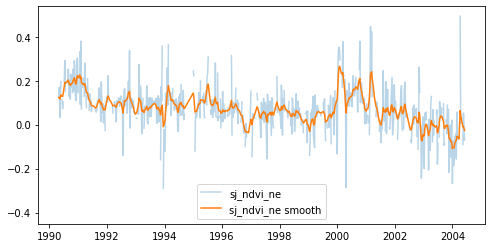

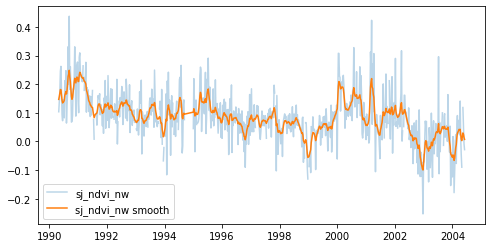

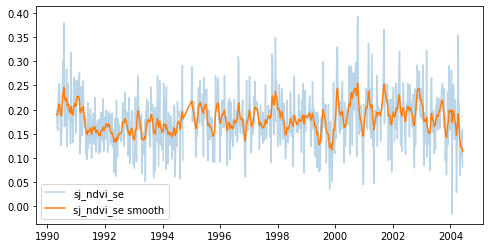

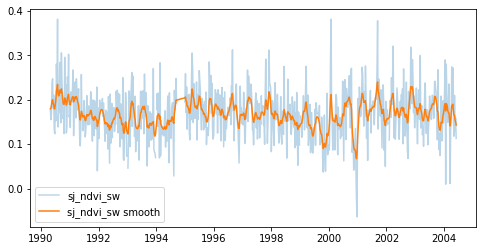

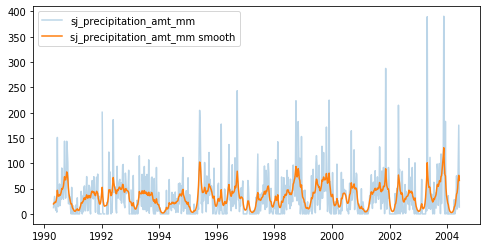

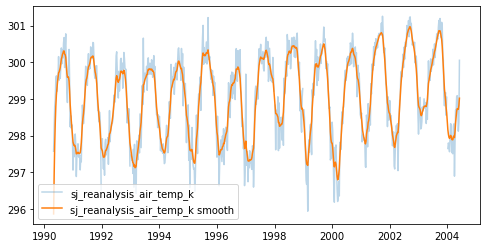

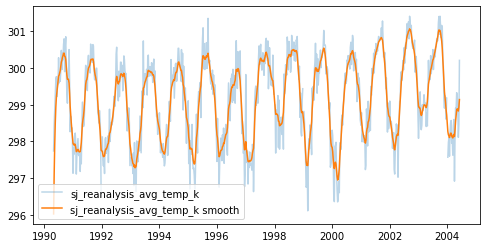

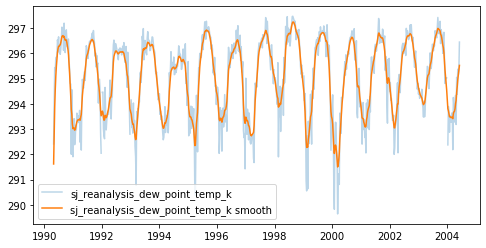

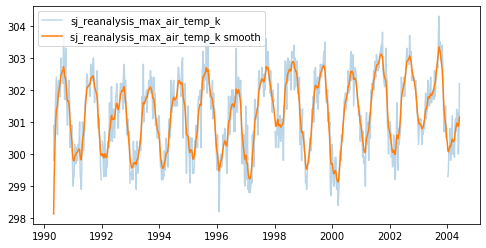

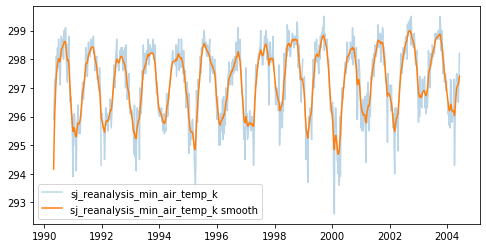

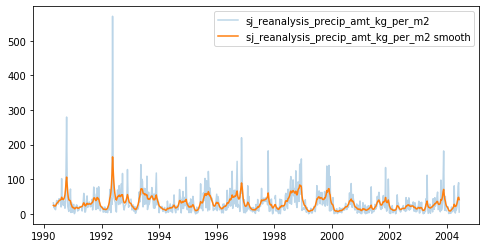

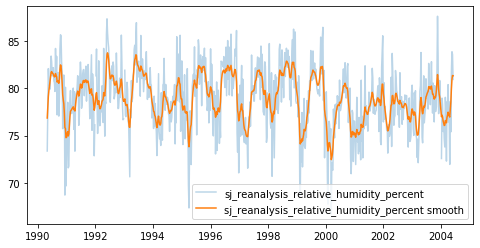

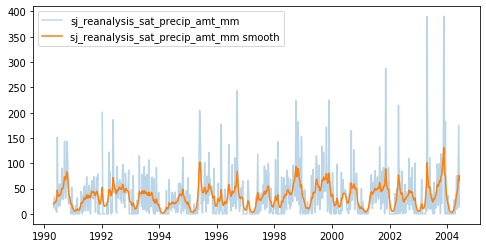

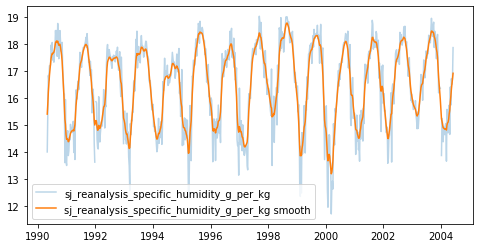

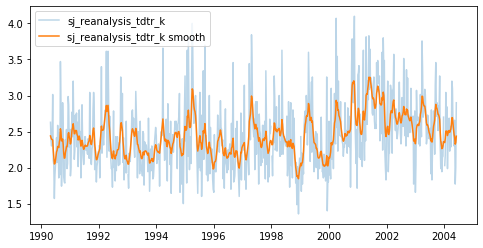

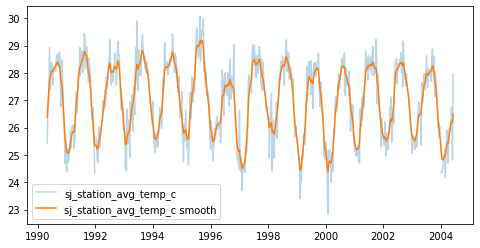

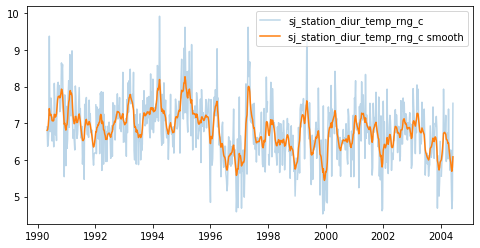

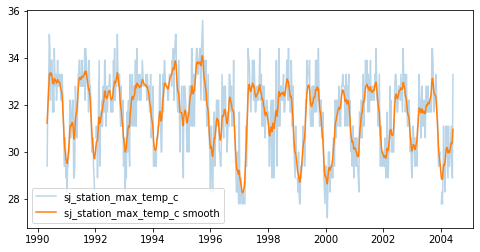

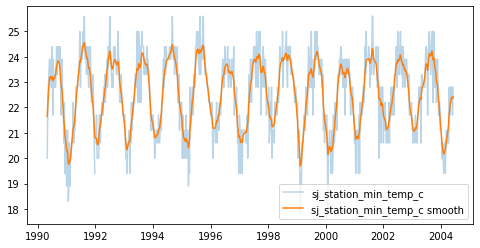

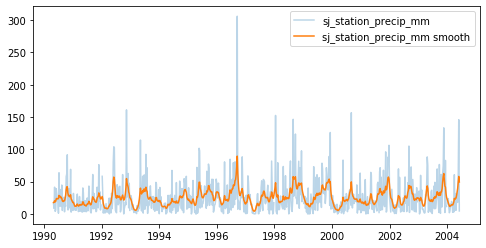

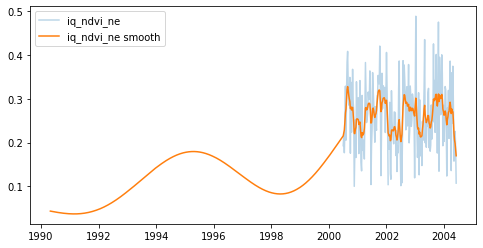

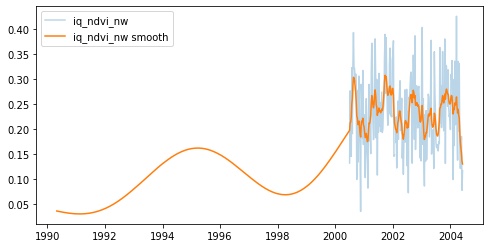

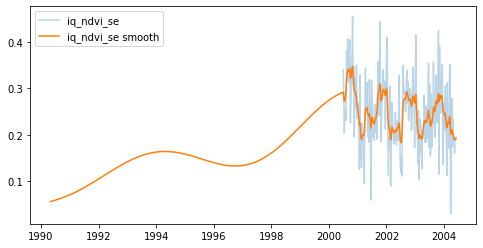

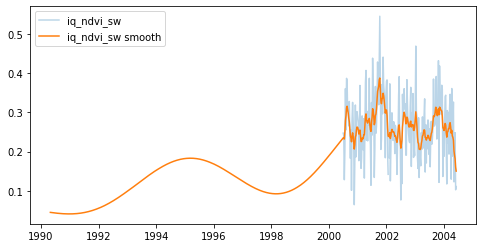

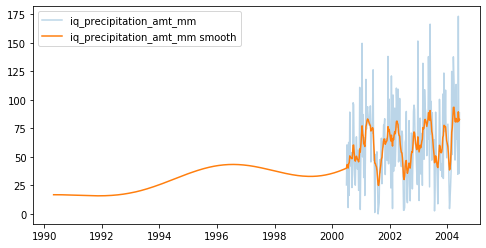

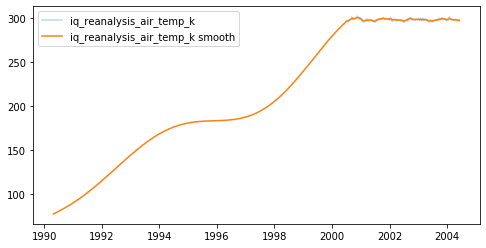

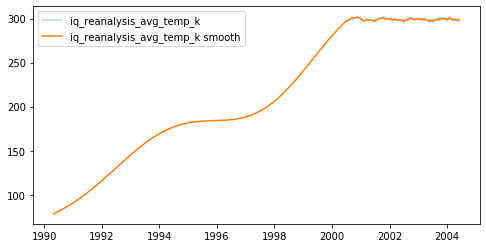

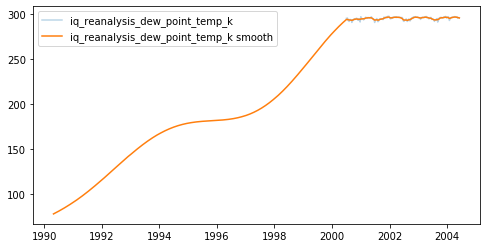

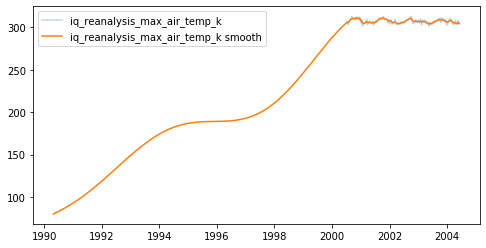

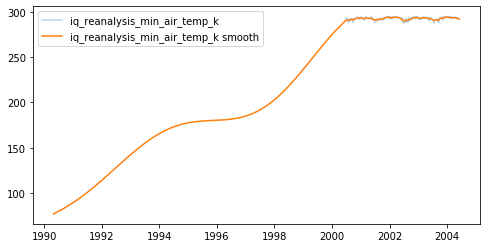

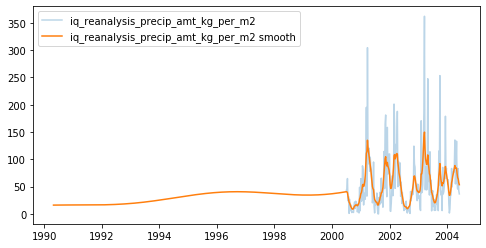

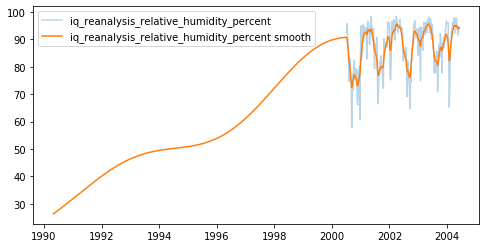

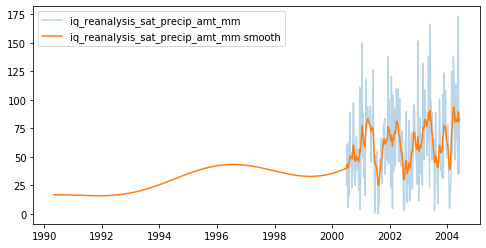

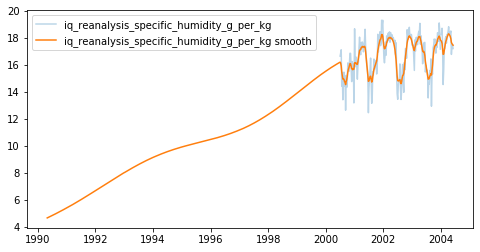

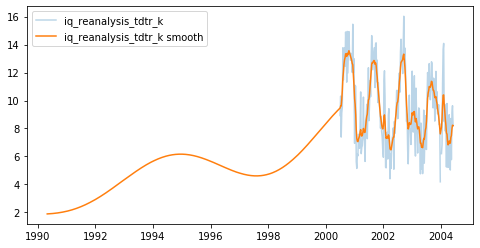

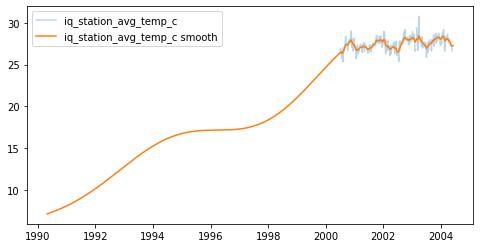

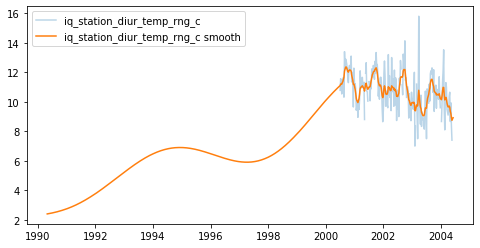

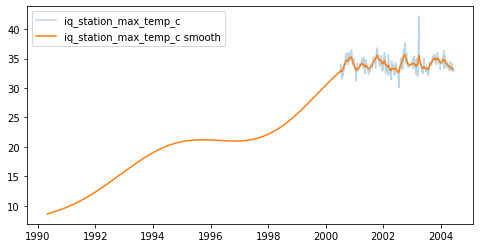

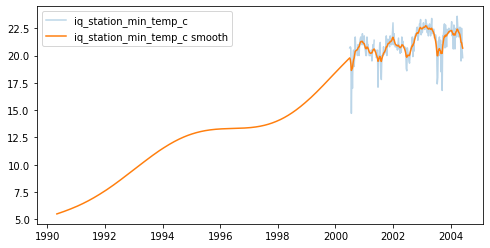

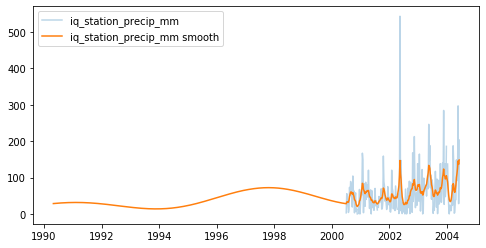

In [5]:
for i, name in enumerate(df_train.columns):
    plt.figure(figsize=(8,4))
    plt.plot(df_train.index, smoother_train.data[i], label=name, alpha=0.3)
    plt.plot(df_train.index, smoother_train.smooth_data[i], label=name+' smooth')
    plt.legend(); plt.show()

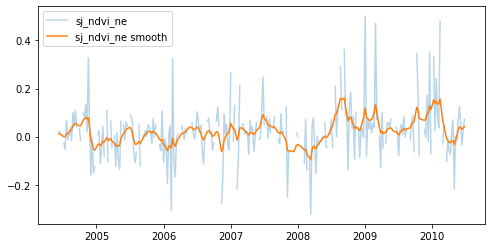

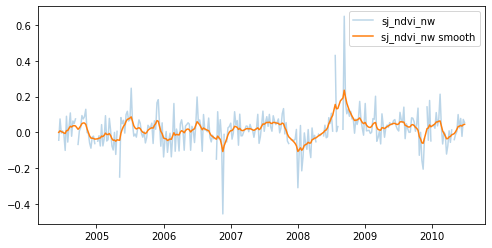

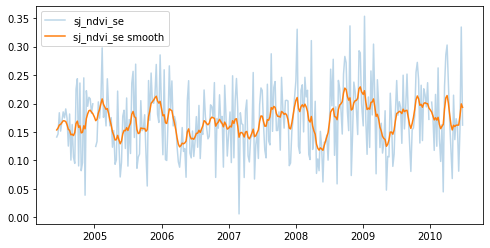

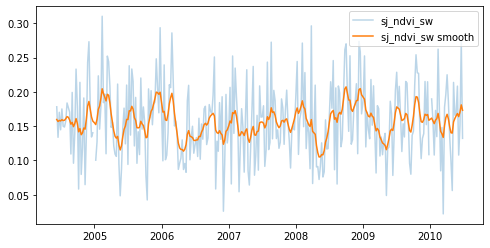

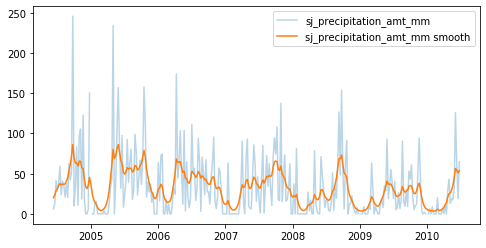

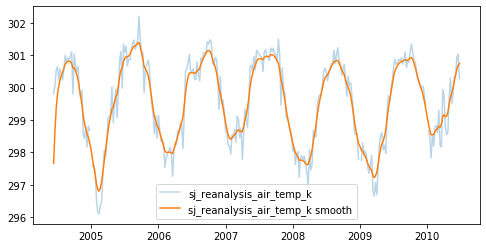

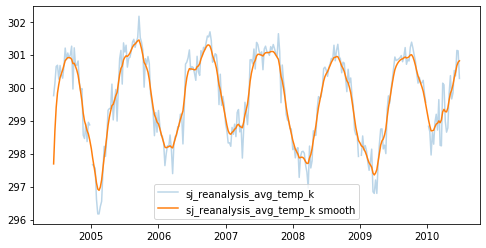

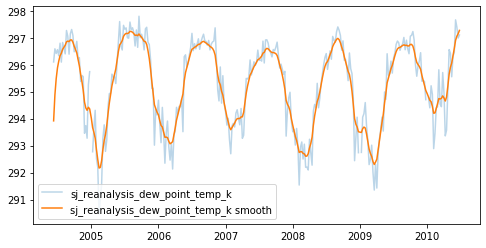

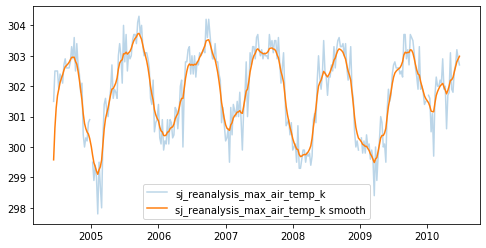

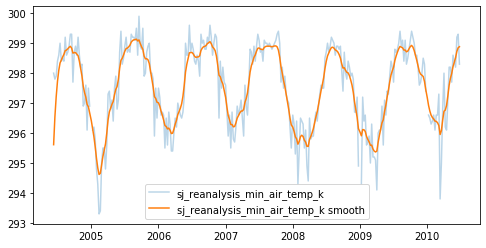

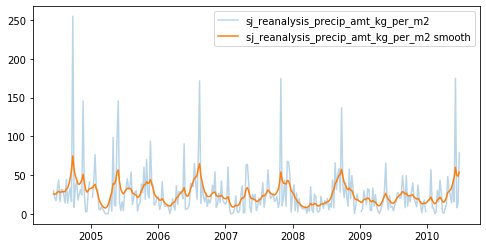

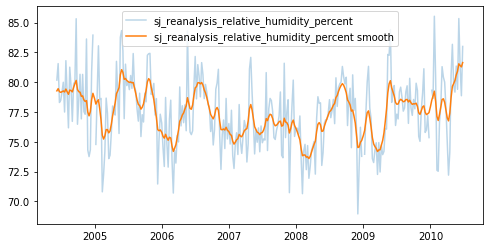

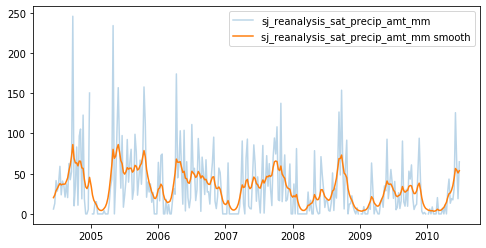

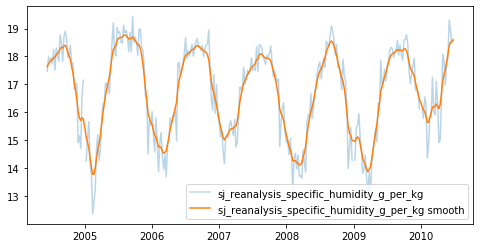

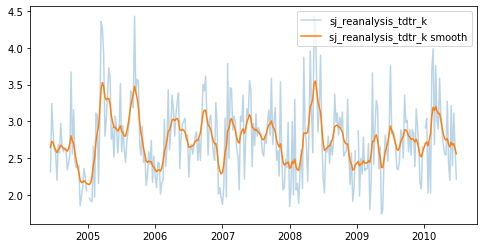

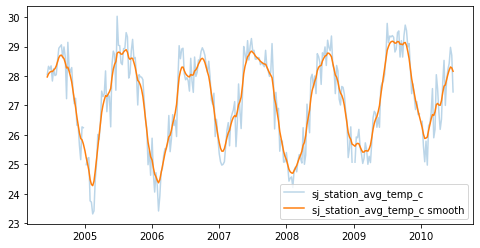

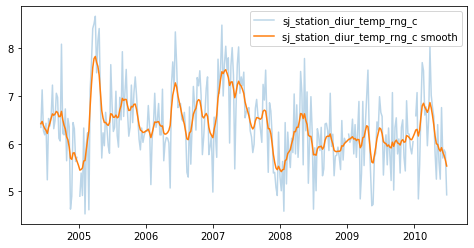

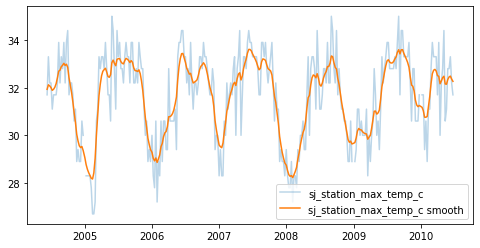

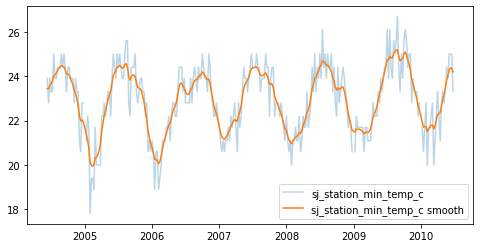

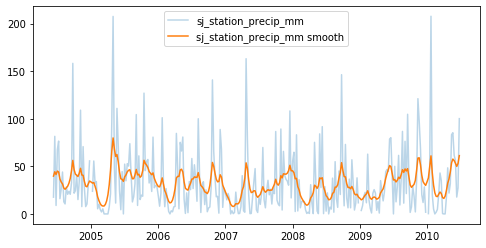

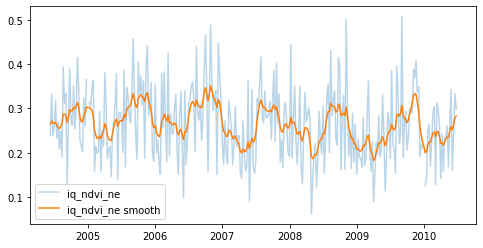

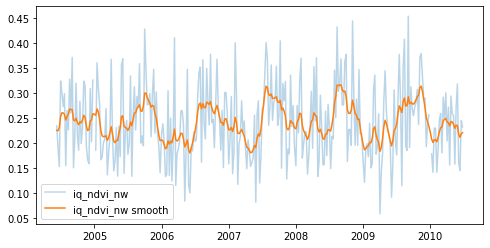

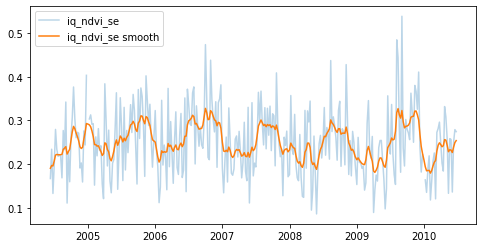

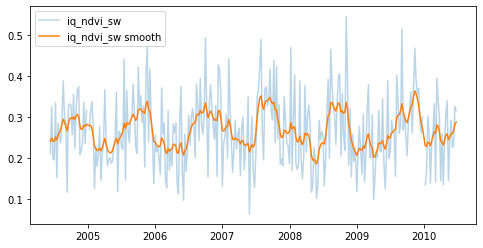

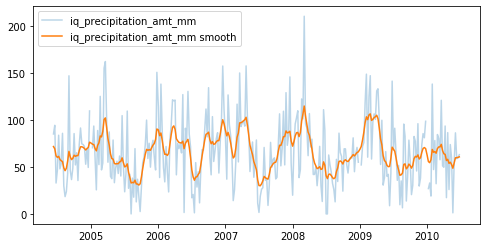

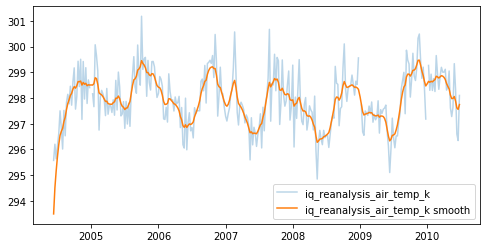

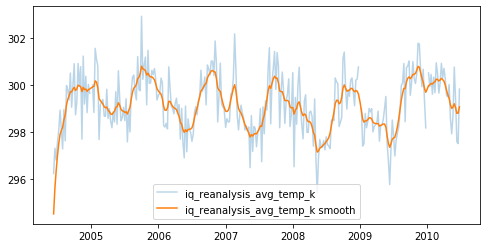

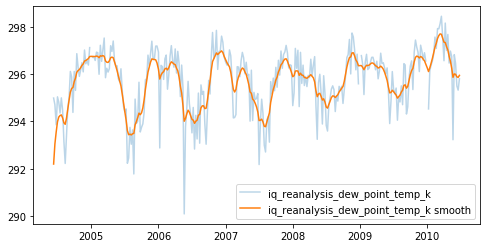

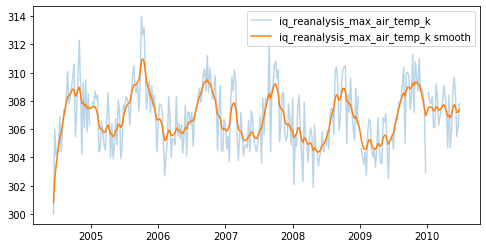

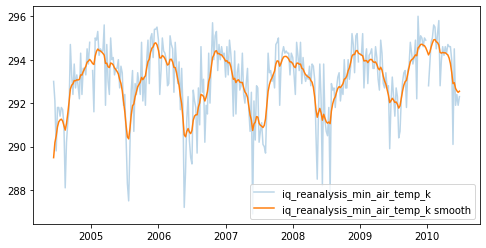

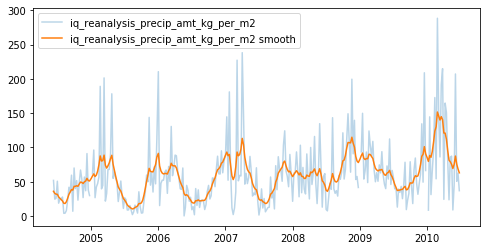

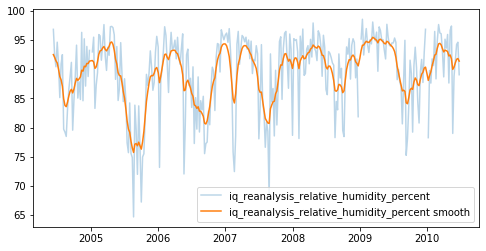

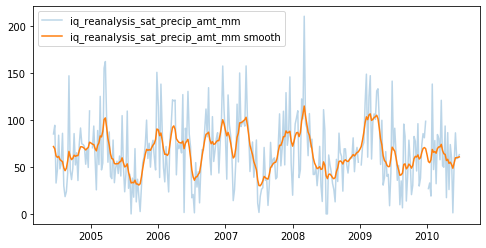

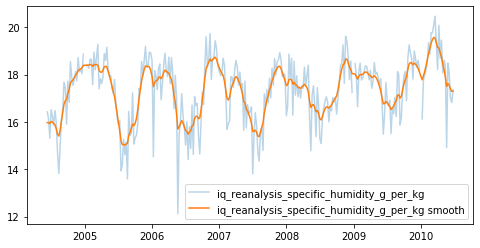

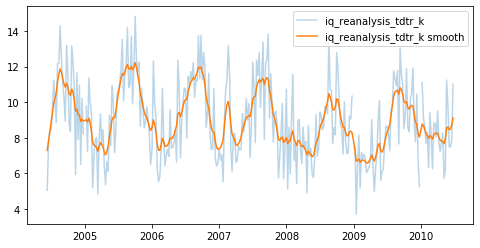

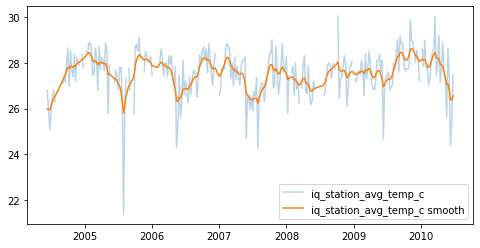

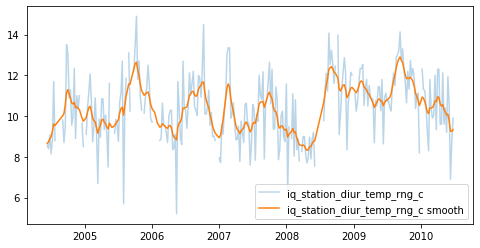

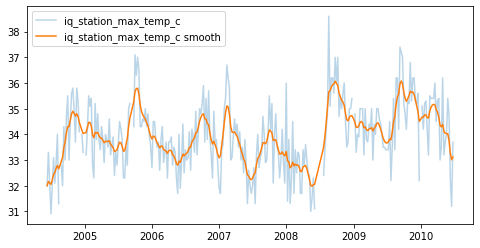

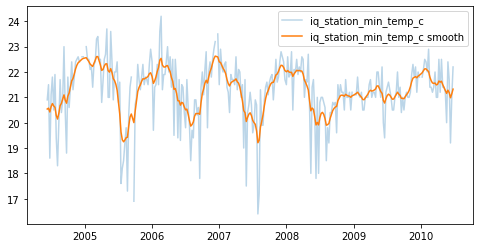

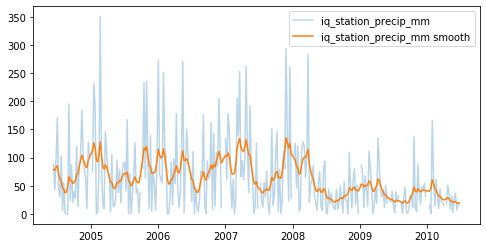

In [6]:
for i, name in enumerate(df_test.columns):
    plt.figure(figsize=(8,4))
    plt.plot(df_test.index, smoother_test.data[i], label=name, alpha=0.3)
    plt.plot(df_test.index, smoother_test.smooth_data[i], label=name+' smooth')
    plt.legend(); plt.show()